In [6]:
# Python
import pandas as pd
from prophet import Prophet



In [7]:
import pickle

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
# Set the display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [10]:
def dbprophet(homeid):
    df = pd.read_csv(f'/Users/barry/CodeAcademy/Ideal_dataset/updated_hourly_csv/hourly_{homeid}.csv')
    df.time = pd.to_datetime(df.time).dt.to_period('h')
    df.index = df.time 
    df_electric = df[['time', 'electric-combined']]
    df_electric.rename(columns={'time': 'ds', 'electric-combined': 'y'}, inplace=True)
    df_electric.ds = df_electric.ds.dt.to_timestamp()
    df_electric_test = df_electric.iloc[-336:]
    df_electric = df_electric.iloc[:len(df) -336]

    #instantiate model
    # Python
    m = Prophet()
    m.fit(df_electric)
    future = m.make_future_dataframe(periods=24*7, freq='H')
    forecast = m.predict(future)
    forecast_pred = forecast.iloc[-336:]
    forecast_merge_actual = forecast_pred.merge(df_electric_test, on = 'ds')
    
    fig, ax = plt.subplots(1,1, figsize = (15,9))
    sns.lineplot(data=forecast_merge_actual, x= 'ds', y='yhat', ax=ax, label='y_pred')
    sns.lineplot(data = forecast_merge_actual, x ='ds', y= 'y', ax=ax, label= 'y_act')
    plt.suptitle(f'1 week prediction v real for house {homeid}')

    fig2 = m.plot_components(forecast)





    
    

In [11]:
def dbprophet_all():
    df = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/combined_houses/6_months_data.csv')
    df.time = pd.to_datetime(df.time).dt.to_period('h')
    df.index = df.time 
    df_electric = df[['time', 'electric-combined', 'temperature_2m (°C)']]
    df_electric.rename(columns={'time': 'ds', 'electric-combined': 'y'}, inplace=True)
    print(df_electric.head())
    df_electric.ds = df_electric.ds.dt.to_timestamp()
    df_electric_test = df_electric.iloc[-336:]
    df_electric = df_electric.iloc[:len(df) -336]
    print(df_electric.head())
    df_electric = df_electric.loc[~df_electric.index.duplicated(keep='first')]
    m = Prophet()
    m.fit(df_electric)
    future = m.make_future_dataframe(periods=24*7, freq='H')
    print(f'length of future: {len(future)}')
    forecast = m.predict(future)
   
    forecast_pred = forecast.iloc[-336:]
    forecast_merge_actual = forecast_pred.merge(df_electric_test, on = 'ds')
    
    fig, ax = plt.subplots(1,1, figsize = (30,9))
    sns.lineplot(data= df_electric, x='ds', y= 'y', ax =ax, label= 'historic')
    sns.lineplot(data=forecast_merge_actual, x= 'ds', y='yhat', ax=ax, label='y_pred')
    sns.lineplot(data = forecast_merge_actual, x ='ds', y= 'y', ax=ax, label= 'y_act')
    plt.suptitle(f'1 week prediction v real for community')

    fig2 = m.plot_components(forecast)

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_15760/2868435632.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electric.rename(columns={'time': 'ds', 'electric-combined': 'y'}, inplace=True)
/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_15760/2868435632.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electric.ds = df_electric.ds.dt.to_timestamp()
23:04:06 - cmdstanpy - INFO - Chain [1] start processing


                                ds        y  temperature_2m (°C)
time                                                            
2017-09-01 00:00  2017-09-01 00:00  3225.60            11.277551
2017-09-01 01:00  2017-09-01 01:00  3283.71            10.387755
2017-09-01 02:00  2017-09-01 02:00  3227.63             9.730612
2017-09-01 03:00  2017-09-01 03:00  3123.89             9.325510
2017-09-01 04:00  2017-09-01 04:00  4279.22             9.043878
                                  ds        y  temperature_2m (°C)
time                                                              
2017-09-01 00:00 2017-09-01 00:00:00  3225.60            11.277551
2017-09-01 01:00 2017-09-01 01:00:00  3283.71            10.387755
2017-09-01 02:00 2017-09-01 02:00:00  3227.63             9.730612
2017-09-01 03:00 2017-09-01 03:00:00  3123.89             9.325510
2017-09-01 04:00 2017-09-01 04:00:00  4279.22             9.043878


23:04:07 - cmdstanpy - INFO - Chain [1] done processing


length of future: 4176


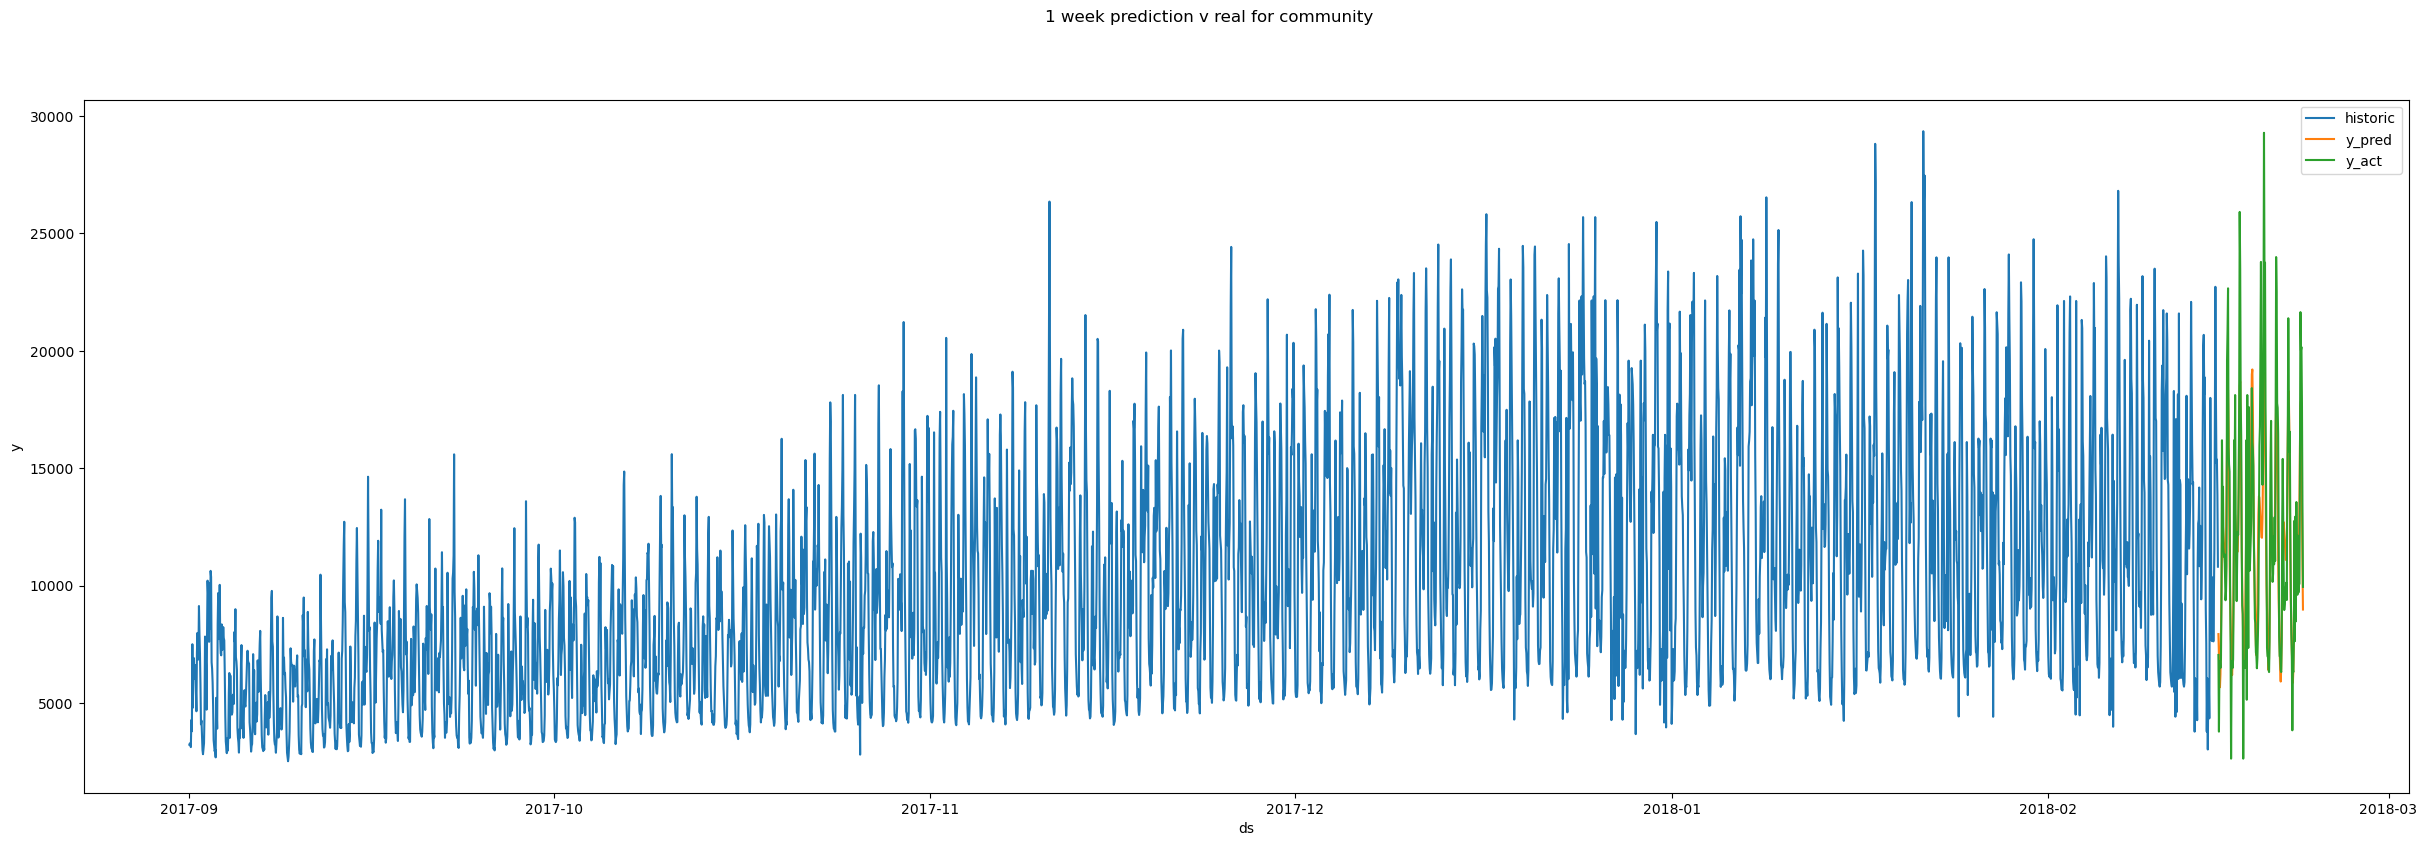

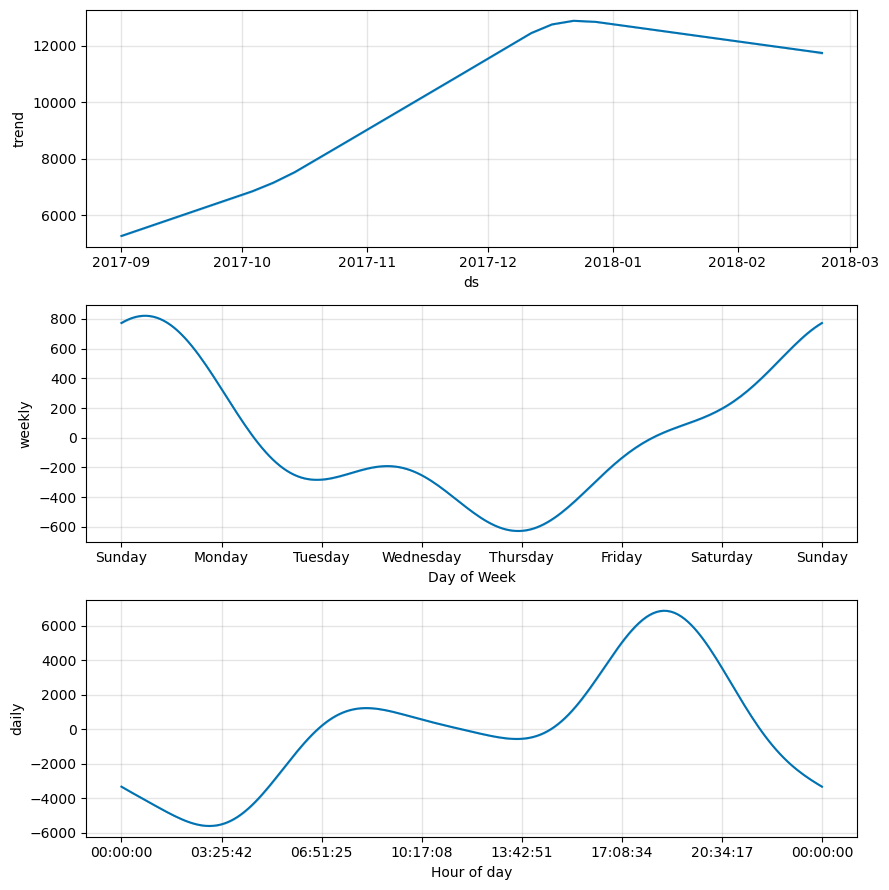

In [12]:
dbprophet_all()

In [13]:
def dbprophet3H(homeid):
    df = pd.read_csv(f'/Users/barry/CodeAcademy/Ideal_dataset/3h_csv/hourly_{homeid}.csv')
    df.time = pd.to_datetime(df.time).dt.to_period('3H')
    df.index = df.time 
    df_electric = df[['time', 'electric-combined']]
    df_electric.rename(columns={'time': 'ds', 'electric-combined': 'y'}, inplace=True)
    df_electric.ds = df_electric.ds.dt.to_timestamp()
    df_electric_test = df_electric.iloc[-96:]
    df_electric = df_electric.iloc[:len(df) -96]
    m = Prophet()
    m.fit(df_electric)
    future = m.make_future_dataframe(periods=96, freq='3H')
    forecast = m.predict(future)
    forecast_pred = forecast.iloc[-96:]
    forecast_merge_actual = forecast_pred.merge(df_electric_test, on = 'ds')
    
    fig, ax = plt.subplots(1,1, figsize = (15,9))
    sns.lineplot(data=forecast_merge_actual, x= 'ds', y='yhat', ax=ax, label='y_pred')
    sns.lineplot(data = forecast_merge_actual, x ='ds', y= 'y', ax=ax, label= 'y_act')
    plt.suptitle(f'1 week prediction v real for house {homeid}')




    
    

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_15760/1411602493.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electric.rename(columns={'time': 'ds', 'electric-combined': 'y'}, inplace=True)
/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_15760/1411602493.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electric.ds = df_electric.ds.dt.to_timestamp()
23:04:08 - cmdstanpy - INFO - Chain [1] start processing
23:04:08 - cmdstanpy - INFO - Chain [1] done processing


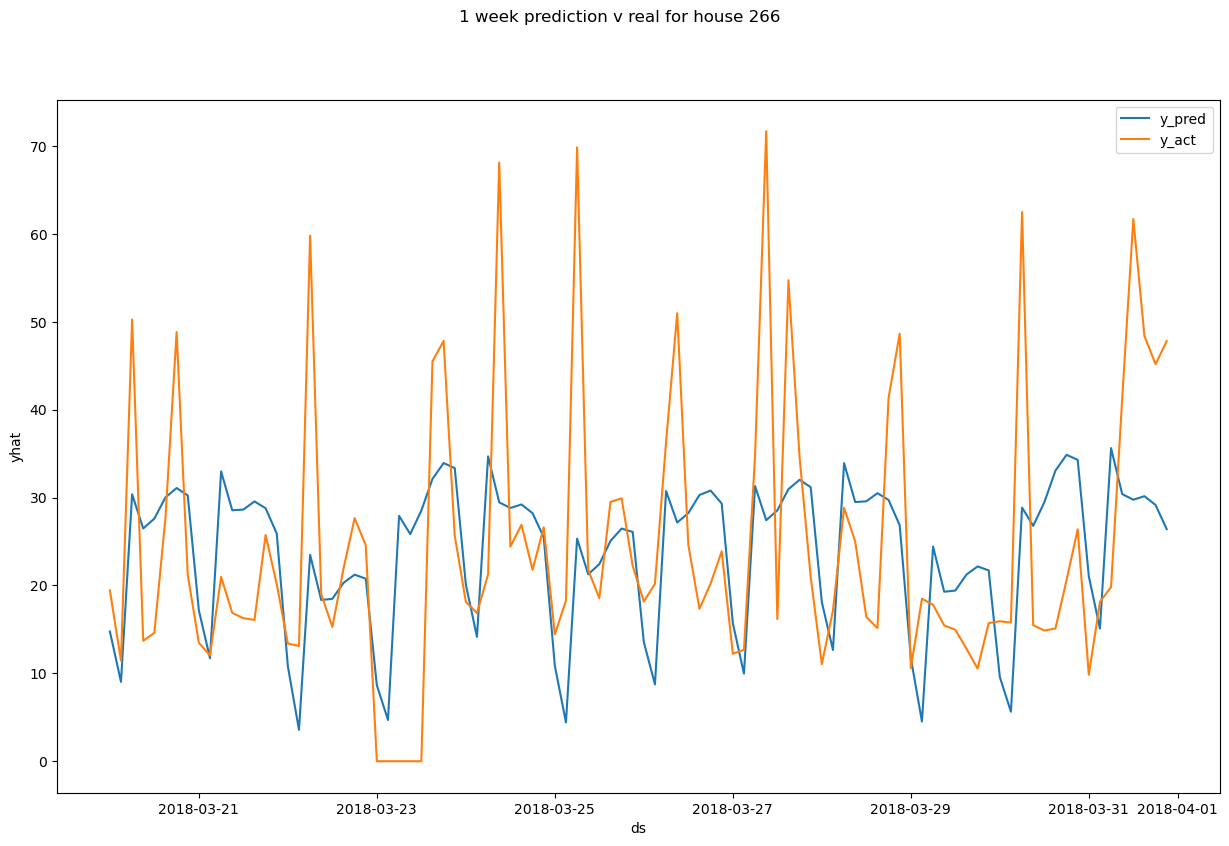

In [14]:
dbprophet3H(266)

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_15760/2601634240.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electric.rename(columns={'time': 'ds', 'electric-combined': 'y'}, inplace=True)
/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_15760/2601634240.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electric.ds = df_electric.ds.dt.to_timestamp()
23:04:09 - cmdstanpy - INFO - Chain [1] start processing
23:04:09 - cmdstanpy - INFO - Chain [1] done processing


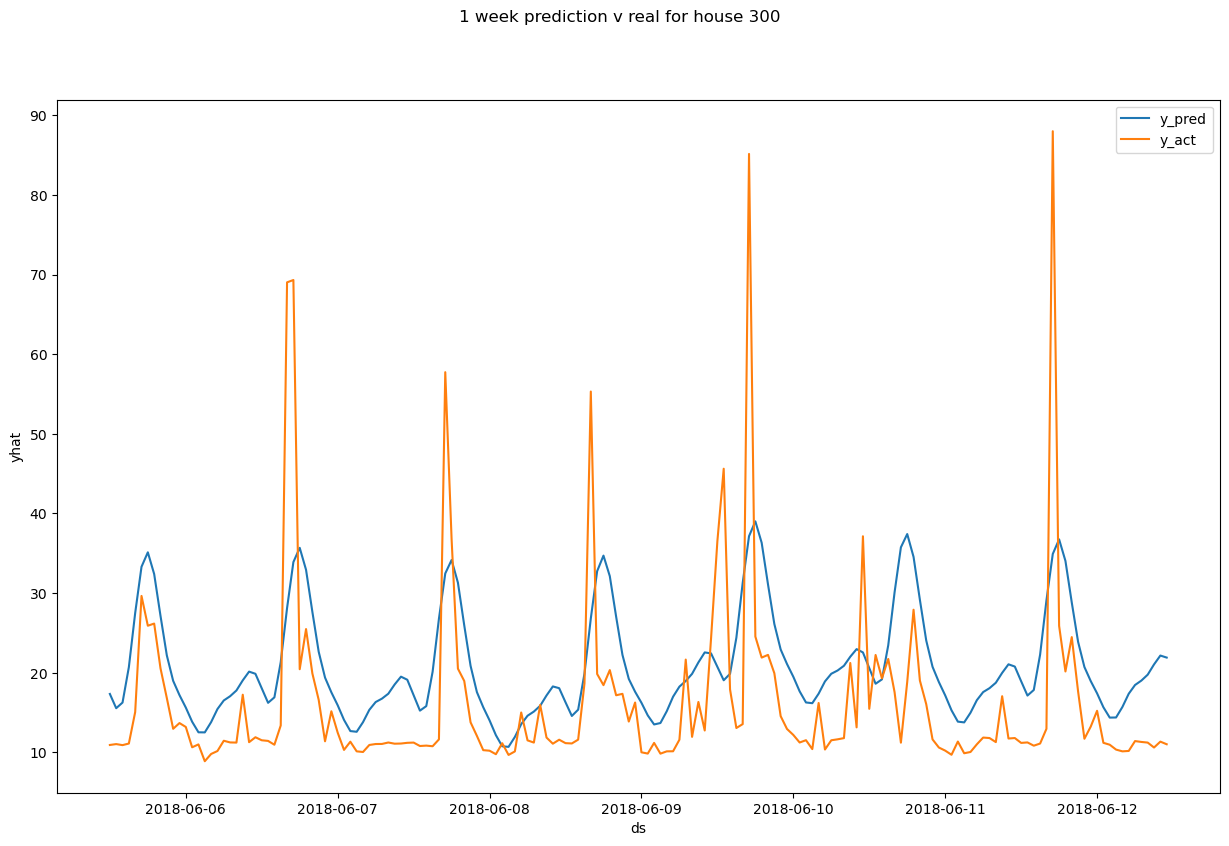

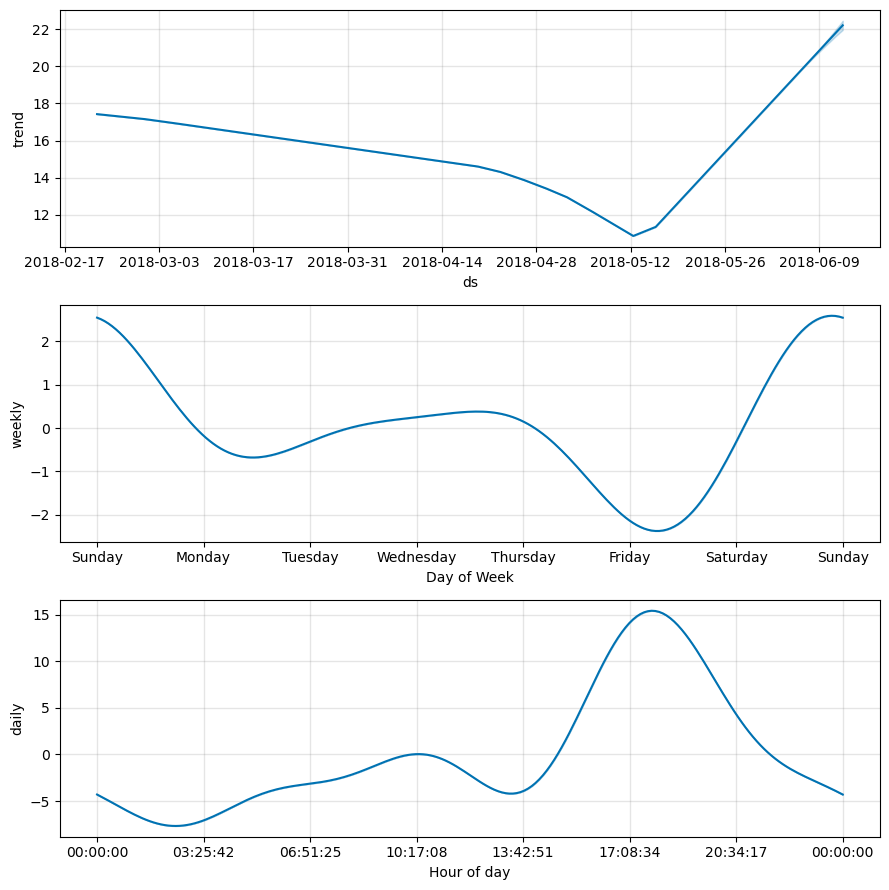

In [15]:
dbprophet(300)

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_15760/2601634240.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electric.rename(columns={'time': 'ds', 'electric-combined': 'y'}, inplace=True)
/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_15760/2601634240.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electric.ds = df_electric.ds.dt.to_timestamp()
23:04:10 - cmdstanpy - INFO - Chain [1] start processing
23:04:10 - cmdstanpy - INFO - Chain [1] done processing


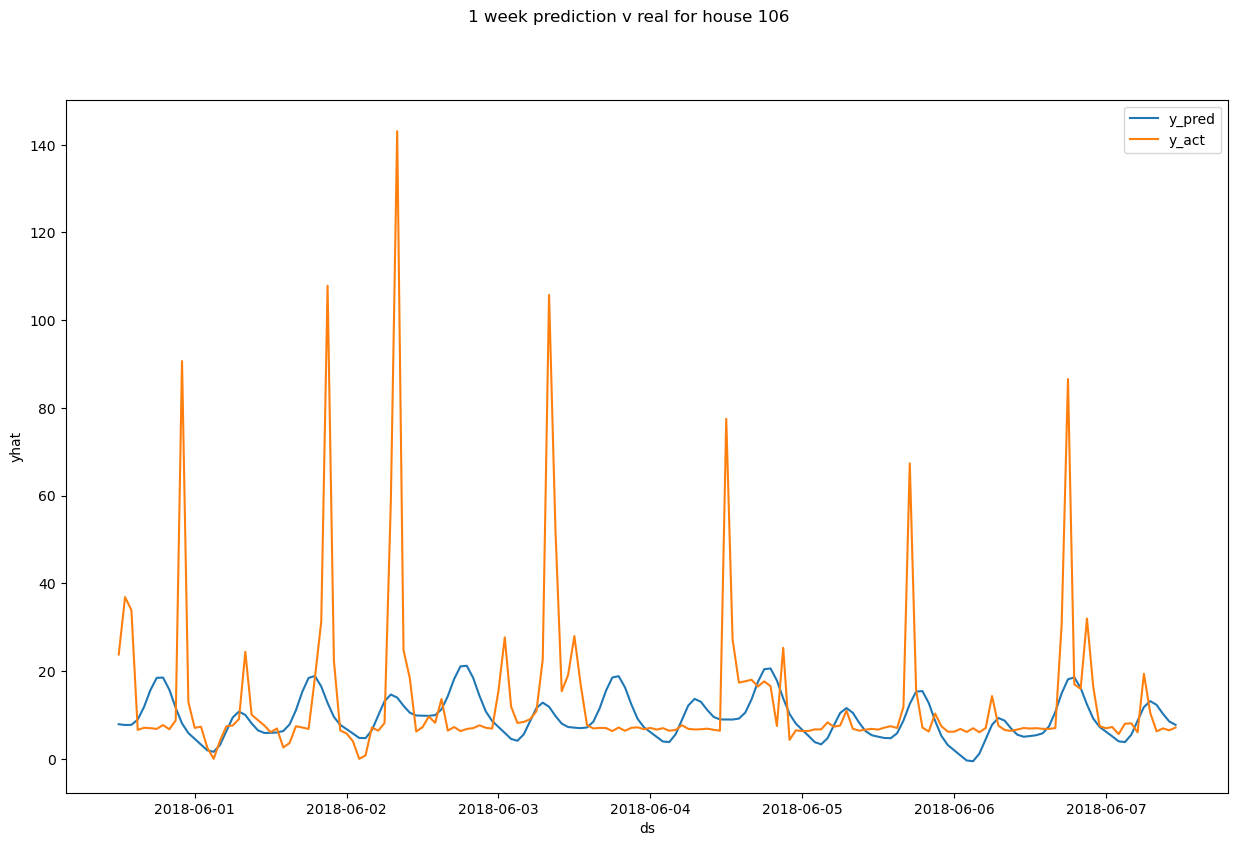

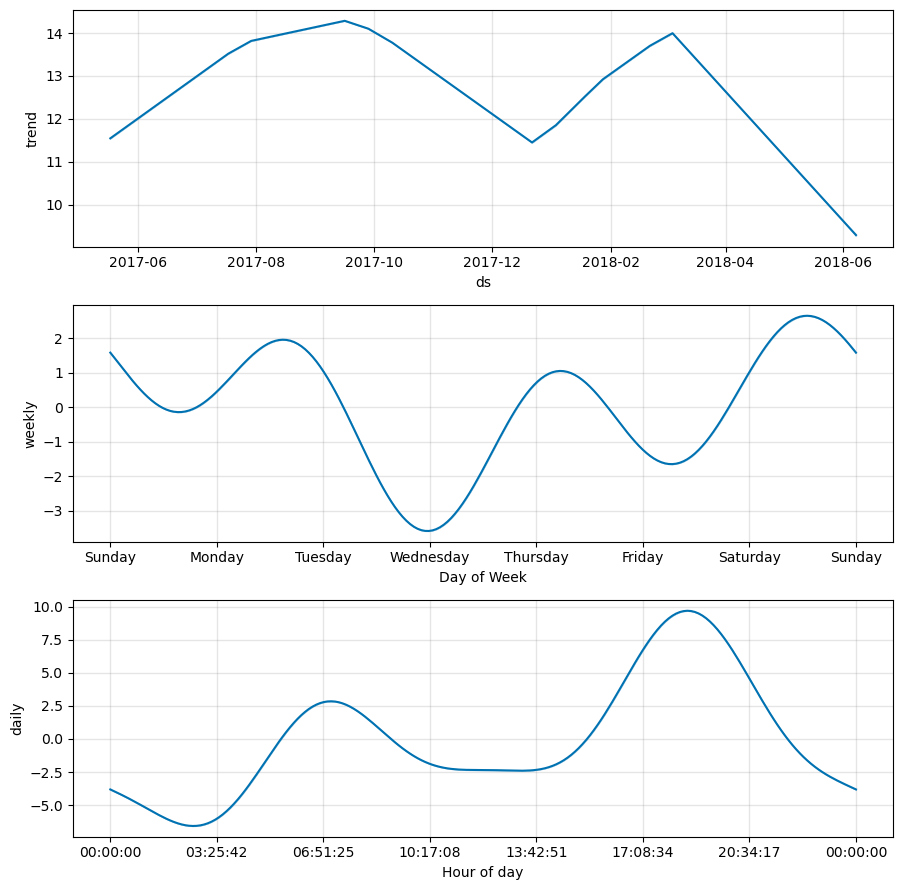

In [16]:
dbprophet(106)

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_15760/2601634240.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electric.rename(columns={'time': 'ds', 'electric-combined': 'y'}, inplace=True)
/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_15760/2601634240.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electric.ds = df_electric.ds.dt.to_timestamp()
23:04:11 - cmdstanpy - INFO - Chain [1] start processing
23:04:12 - cmdstanpy - INFO - Chain [1] done processing


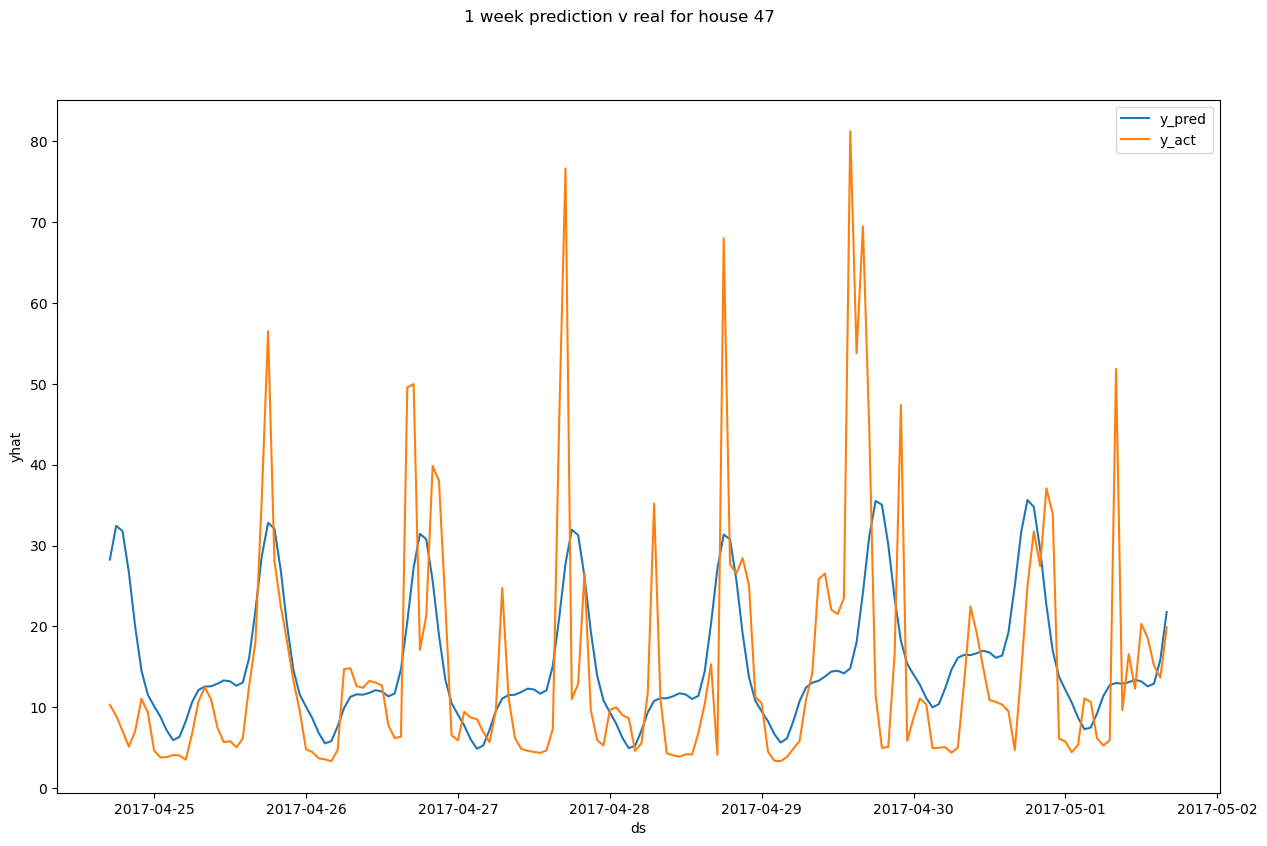

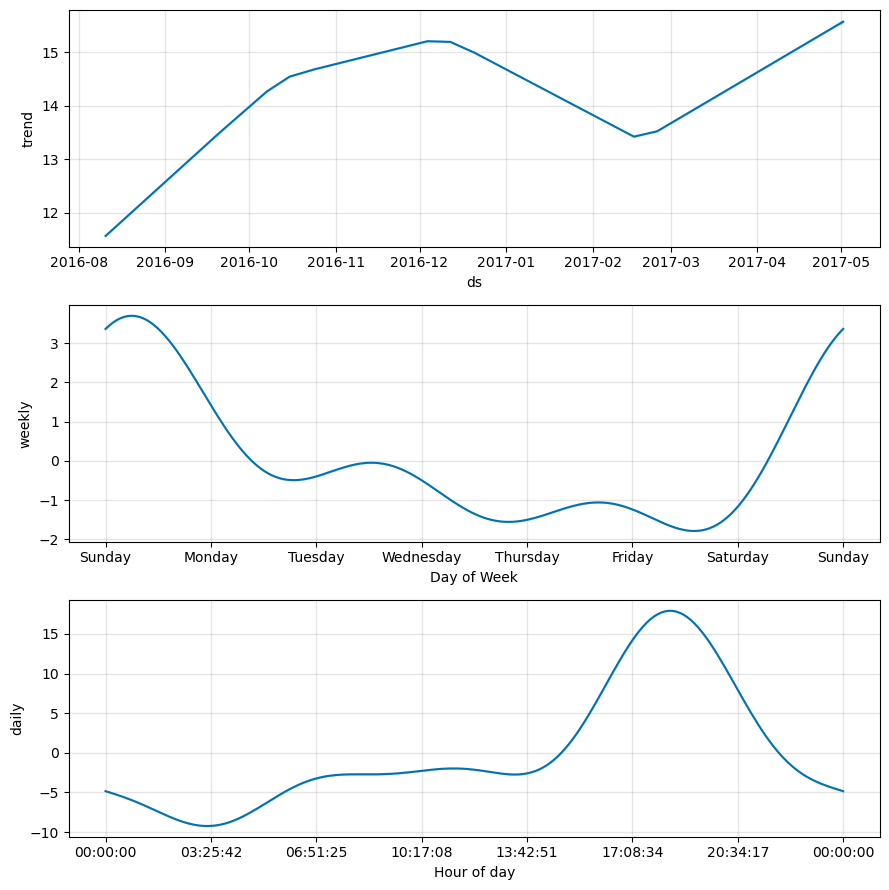

In [17]:
dbprophet(47)


In [18]:
#df = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/updated_hourly_csv/hourly_106.csv')

In [19]:
df = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/combined_houses/combined_houses_1H')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/barry/CodeAcademy/Ideal_dataset/combined_houses/combined_houses_1H'

In [ ]:
df_test = df.iloc[-168:]

In [ ]:
df= df.iloc[:len(df) -168]

In [ ]:
df.time = pd.to_datetime(df.time).dt.to_period('h')

In [ ]:
df.index = df.time

In [ ]:
df_electric = pd.DataFrame(df['electric-combined'])

In [ ]:
df_electric = df_electric.reset_index()

In [ ]:
df_electric.rename(columns={'time': 'ds', 'electric-combined': 'y'}, inplace=True)

In [ ]:
df_electric.ds = df_electric.ds.dt.to_timestamp()

In [ ]:
df_electric_test = df_electric.iloc[-168:]

In [ ]:
df_electric = df_electric.iloc[:len(df) -168]

In [ ]:
df_electric.tail()


In [ ]:
# Python
m = Prophet()
m.fit(df_electric)

In [ ]:
future = m.make_future_dataframe(periods=24*7, freq='H')


In [ ]:
forecast = m.predict(future)
display(forecast.head())
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



In [ ]:
df_electric.head()

In [ ]:
forecast_pred = forecast.iloc[-168:]


In [ ]:
df_electric_test.ds.head()

In [ ]:
forecast_merge_actual = forecast_pred.merge(df_electric_test, on = 'ds')

In [ ]:
display(forecast_merge_actual[['ds','yhat', 'y']].head())

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (9,6))
sns.lineplot(data=forecast_merge_actual, x= 'ds', y='yhat', ax=ax, label='y_pred')
sns.lineplot(data = forecast_merge_actual, x ='ds', y= 'y', ax=ax, label= 'y_act')

In [ ]:
# Python
fig1 = m.plot(forecast)



In [ ]:
# Python
fig2 = m.plot_components(forecast)

In [20]:

def dbprophet_all_pickle():
    df = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/combined_houses/6_months_data.csv')
    df.time = pd.to_datetime(df.time).dt.to_period('h')
    df.index = df.time 
    df_electric = df[['time', 'electric-combined']]
    df_electric.rename(columns={'time': 'ds', 'electric-combined': 'y'}, inplace=True)
    print(df_electric.head())
    df_electric.ds = df_electric.ds.dt.to_timestamp()
    df_electric = df_electric.loc[~df_electric.index.duplicated(keep='first')]
    m = Prophet()
    m.fit(df_electric)
    with open('/Users/barry/CodeAcademy/Ideal_dataset/coding/models/model.pkl', 'wb') as f:
        pickle.dump(m, f)
    

In [ ]:
print(pd.__version__)

In [ ]:
import cmdstanpy
from prophet import Prophet
import pkg_resources

cmdstanpy_version = cmdstanpy.__version__
prophet_version = pkg_resources.get_distribution("prophet").version

print(f"cmdstanpy version: {cmdstanpy_version}")
print(f"prophet version: {prophet_version}")

In [21]:
dbprophet_all_pickle()

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_15760/3269485986.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electric.rename(columns={'time': 'ds', 'electric-combined': 'y'}, inplace=True)
/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_15760/3269485986.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electric.ds = df_electric.ds.dt.to_timestamp()
23:04:31 - cmdstanpy - INFO - Chain [1] start processing


                                ds        y
time                                       
2017-09-01 00:00  2017-09-01 00:00  3225.60
2017-09-01 01:00  2017-09-01 01:00  3283.71
2017-09-01 02:00  2017-09-01 02:00  3227.63
2017-09-01 03:00  2017-09-01 03:00  3123.89
2017-09-01 04:00  2017-09-01 04:00  4279.22


23:04:31 - cmdstanpy - INFO - Chain [1] done processing
